In [1]:
from time import perf_counter

import numpy as np
import matplotlib.pyplot as plt

from derivkit.kit import DerivativeKit
from derivkit.plotutils.plot_style import apply_plot_style
from derivkit.plotutils.plot_style import DEFAULT_COLORS, GRADIENT_COLORS, DEFAULT_LINEWIDTH

from derivkit.plotutils import plot_kit as pk

# Apply consistent style
apply_plot_style()


In [ ]:
%%time

sleep_times = np.round(np.geomspace(0.001, 0.1, 12), 4).tolist()
orders = [1, 2, 3]

# Initialize empty timing dictionaries manually
timings_adaptive = {1: [], 2: [], 3: []}
timings_finite   = {1: [], 2: [], 3: []}

for order in orders:
    for sleep in sleep_times:
        f = pk.make_slow_func(sleep)
        kit = DerivativeKit(f, central_value=0.0005, derivative_order=order)

        # Adaptive method
        start = perf_counter()
        _ = kit.adaptive.compute()
        timings_adaptive[order].append(perf_counter() - start)

        # Finite difference method
        start = perf_counter()
        _ = kit.finite.compute(stencil_points=5, stencil_stepsize=0.01)
        timings_finite[order].append(perf_counter() - start)


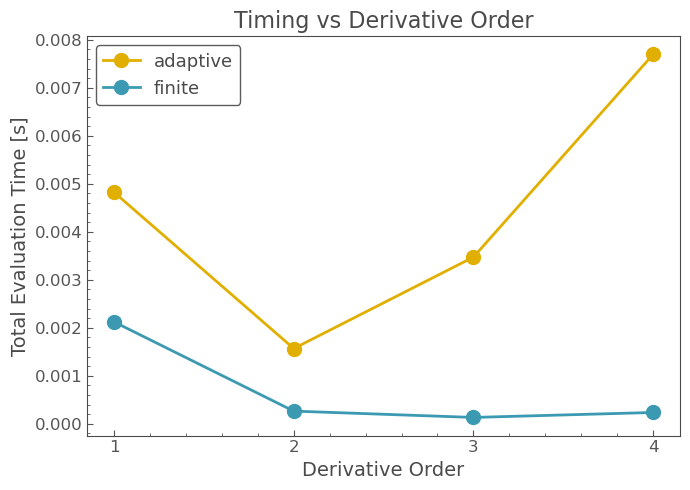

In [2]:
def function(x):
    return np.sin(x**2) * np.exp(-x**2) + np.log1p(x**2)
central_value = 0.0005

# Orders to test
orders = [1, 2, 3, 4]

pk.benchmark_derivative_timing_vs_order(function,
                                         central_value,
                                         orders)

/Users/niko/Documents/Research/Derivative-Calculator/derivkit/adaptive_fit.py:198: RuntimeWarning: [AdaptiveFitDerivative] Falling back to finite differences because polynomial fit did not meet tolerance.
  warnings.warn(


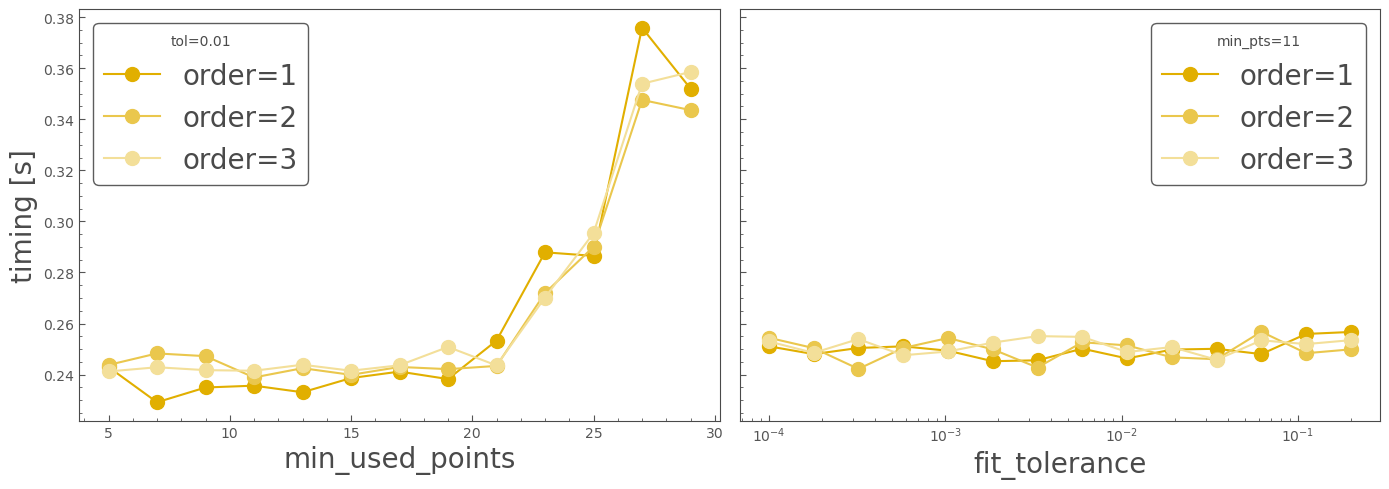

In [3]:
pk.plot_adaptive_timing_sweeps()
